In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

In [3]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [6]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [7]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv("./Loan_dataset.csv")

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [11]:
df.Loan_Status

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [12]:
df.shape

(614, 13)

In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [15]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns
numerical_features

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [16]:
categorical_features

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [18]:
df.Loan_Status

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [19]:
df.shape

(614, 13)

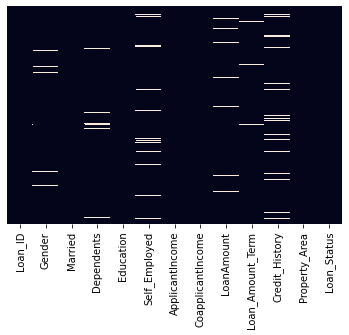

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [22]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [24]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [26]:
df.var()

ApplicantIncome      3.732039e+07
CoapplicantIncome    8.562930e+06
LoanAmount           7.325190e+03
Loan_Amount_Term     4.240668e+03
Credit_History       1.331362e-01
dtype: float64

In [27]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [28]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [29]:
df.std()

ApplicantIncome      6109.041673
CoapplicantIncome    2926.248369
LoanAmount             85.587325
Loan_Amount_Term       65.120410
Credit_History          0.364878
dtype: float64

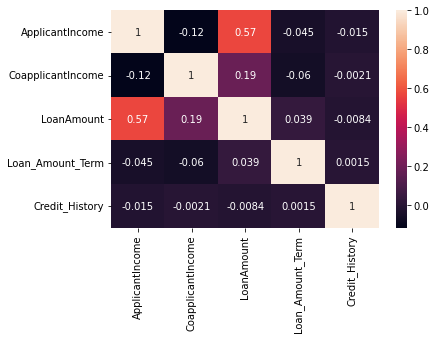

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

df.corr()
plt.figure(1)
sns.heatmap(df.corr(), annot = True)

In [31]:
data=df
data = np.random.randint(low=1,high=100,size=(10,10))
print(data)

[[57 15 77 87 70 89 35 92 52 85]
 [ 6 43 40 48 11 80 15 24 43 99]
 [ 6  2 30 41 61  4 64 77 75  8]
 [64 56 46 60 43  9 54 97 96 89]
 [48 81 77 23 28 41 93 68 48 23]
 [94 62 62 42 34 82 32 80 95  9]
 [45 10 94 83 73 87 98 24 57 20]
 [82 68 12 20  4 32 20 14 20 52]
 [20 17 66 90 40 53 34 43 72 27]
 [81 31 10 56 18  6 17  5 51 19]]


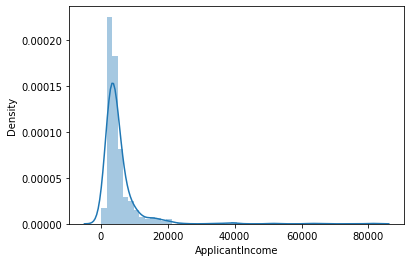

In [32]:
sns.distplot(df['ApplicantIncome'])

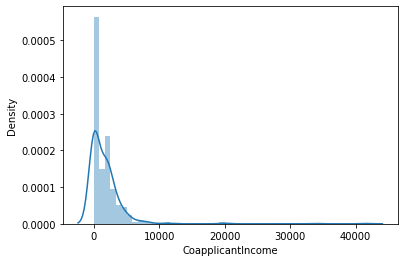

In [33]:
sns.distplot(df['CoapplicantIncome'])

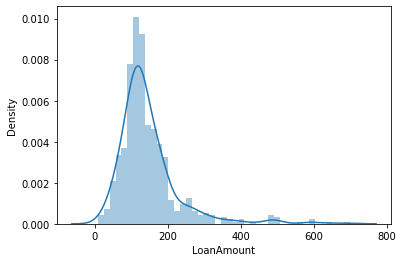

In [34]:
sns.distplot(df['LoanAmount'])

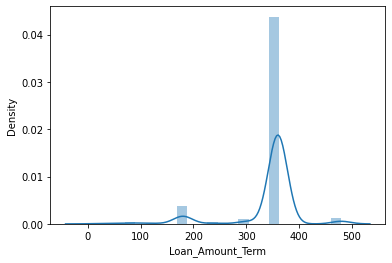

In [35]:
sns.distplot(df['Loan_Amount_Term'])

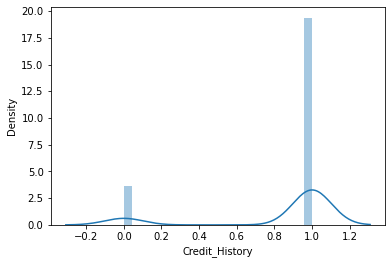

In [36]:
sns.distplot(df['Credit_History'])

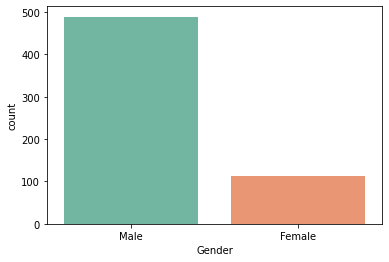

In [37]:
sns.countplot(df.Gender , data = df, palette = 'Set2')

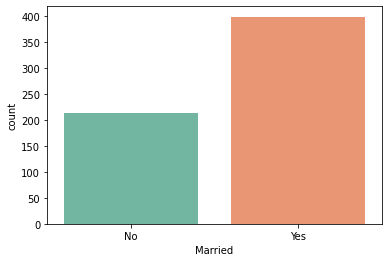

In [38]:
sns.countplot(df.Married , data = df, palette = 'Set2')

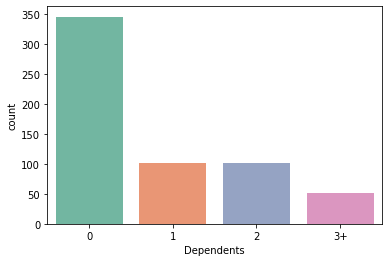

In [39]:
sns.countplot(df.Dependents , data = df, palette = 'Set2')

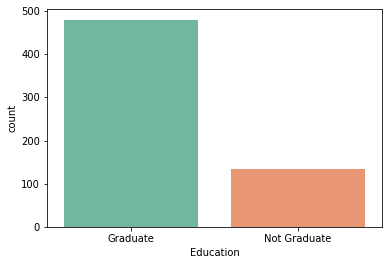

In [40]:
sns.countplot(df.Education , data = df, palette = 'Set2')

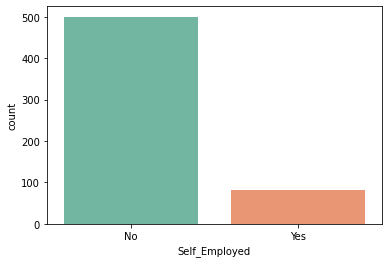

In [41]:
sns.countplot(df.Self_Employed , data = df, palette = 'Set2')

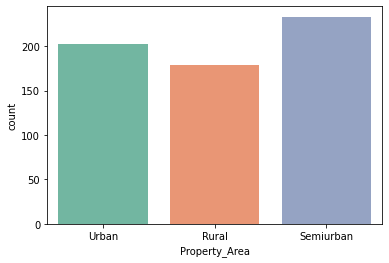

In [42]:
sns.countplot(df.Property_Area , data = df, palette = 'Set2')

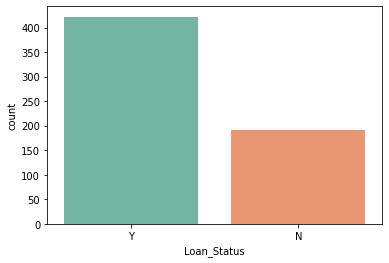

In [43]:
sns.countplot(df.Loan_Status , data = df, palette = 'Set2')

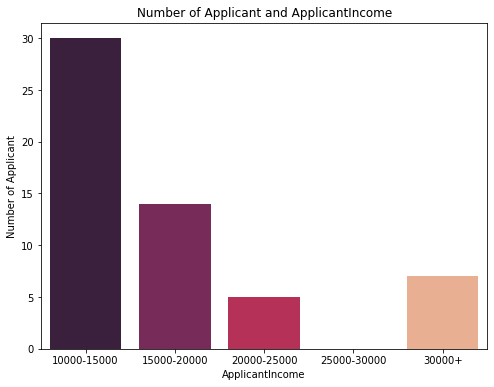

In [44]:
ApplicantIncome15000_10000 = df.ApplicantIncome[(df.ApplicantIncome <= 15000) & (df.ApplicantIncome >= 10000)]
ApplicantIncome20000_15000 = df.ApplicantIncome[(df.ApplicantIncome <= 20000) & (df.ApplicantIncome >= 15000)]
ApplicantIncome25000_20000 = df.ApplicantIncome[(df.ApplicantIncome <= 25000) & (df.ApplicantIncome >= 20000)]
ApplicantIncome30000_25000 = df.ApplicantIncome[(df.ApplicantIncome <= 30000) & (df.ApplicantIncome >= 25000)]
ApplicantIncome30000above = df.ApplicantIncome[df.ApplicantIncome >= 30000]
x = ["10000-15000","15000-20000","20000-25000","25000-30000","30000+"]
y = [len(ApplicantIncome15000_10000.values),len(ApplicantIncome20000_15000.values),len(ApplicantIncome25000_20000.values),len(ApplicantIncome30000_25000.values),len(ApplicantIncome30000above.values)]
plt.figure(figsize=(8,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Applicant and ApplicantIncome")
plt.xlabel("ApplicantIncome")
plt.ylabel("Number of Applicant")
plt.show()

<Figure size 864x720 with 0 Axes>

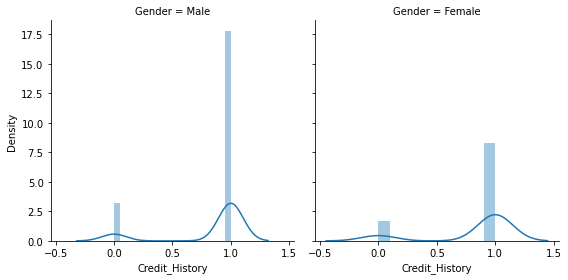

In [45]:
plt.figure(3, figsize=(12, 10))
g = sns.FacetGrid(data = df, col= 'Gender', height = 4)
g.map(sns.distplot, 'Credit_History')

<Figure size 864x720 with 0 Axes>

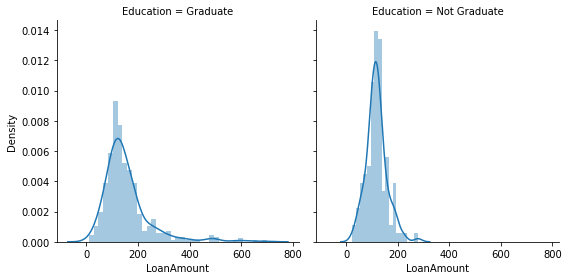

In [46]:
plt.figure(3, figsize=(12, 10))
g = sns.FacetGrid(data = df, col= 'Education', height = 4)
g.map(sns.distplot, 'LoanAmount')

<Figure size 864x720 with 0 Axes>

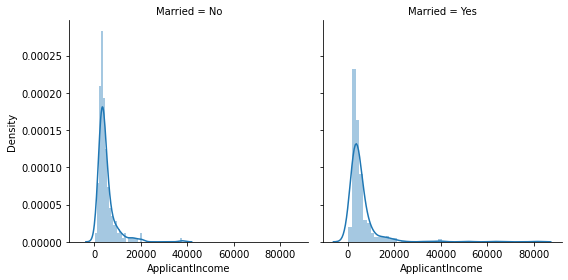

In [47]:
plt.figure(3, figsize=(12, 10))
g = sns.FacetGrid(data = df, col= 'Married', height = 4)
g.map(sns.distplot, 'ApplicantIncome')

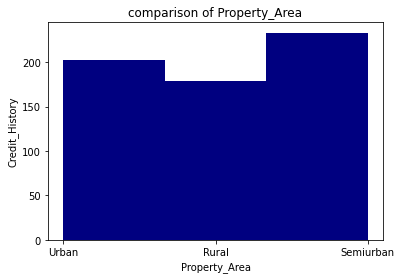

In [48]:
plt.hist(x = df.Property_Area, bins = 3, color="navy")
plt.title('comparison of Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('Credit_History')
plt.show()

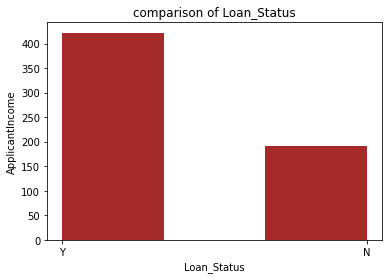

In [49]:
plt.hist(x = df.Loan_Status, bins = 3, color="brown")
plt.title('comparison of Loan_Status')
plt.xlabel('Loan_Status')
plt.ylabel('ApplicantIncome')
plt.show()

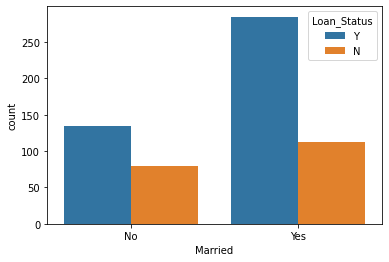

In [50]:
sns.countplot(x="Married", hue="Loan_Status",data=df)

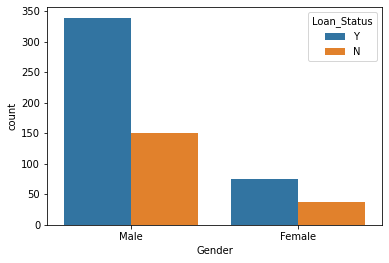

In [51]:
sns.countplot(x="Gender", hue="Loan_Status", data=df)

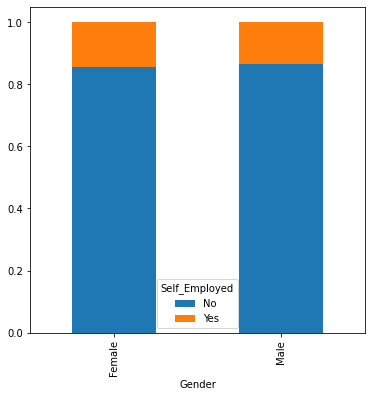

In [52]:
Gender = pd.crosstab(df['Gender'],df['Self_Employed'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6))

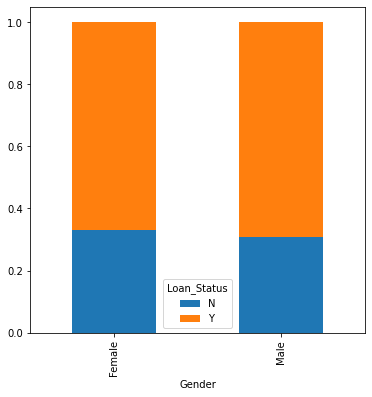

In [53]:
Gender = pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6))

In [54]:
total_0 = df.Loan_Amount_Term[df.Dependents == '0'].sum()
total_1 = df.Loan_Amount_Term[df.Dependents == '1'].sum()
total_2 = df.Loan_Amount_Term[df.Dependents == '2'].sum()
total_3above = df.Loan_Amount_Term[df.Dependents == '3+'].sum()

print("Total Balance in Dependents 0 :",total_0)
print("Total Balance in Dependents 1 :",total_1)
print("Total Balance in Dependents 2 :",total_2)
print("Total Balance in Dependents 3 :",total_3above)

Total Balance in Dependents 0 : 116268.0
Total Balance in Dependents 1 : 33264.0
Total Balance in Dependents 2 : 34428.0
Total Balance in Dependents 3 : 16260.0


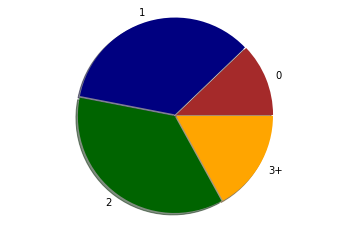

In [55]:
labels = '0', '1','2' ,'3+'
colors = ['brown', 'navy', 'darkgreen' , 'orange']
sizes =  [116, 332, 344, 162]
explode = [ 0.01, 0.01, 0.01, 0.01]

plt.pie(sizes, colors = colors, labels = labels, explode = explode, shadow = True)

plt.axis('equal')
plt.show()

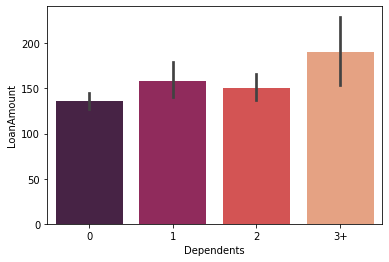

In [56]:
sns.barplot(df.Dependents,df.LoanAmount, hue_order=df.Gender ,palette="rocket")

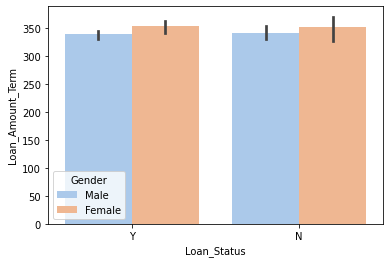

In [57]:
sns.barplot(df.Loan_Status,df.Loan_Amount_Term,hue=df.Gender, palette="pastel")

Text(0.5, 1.0, 'Credit_History vs ApplicantIncome and Gender')

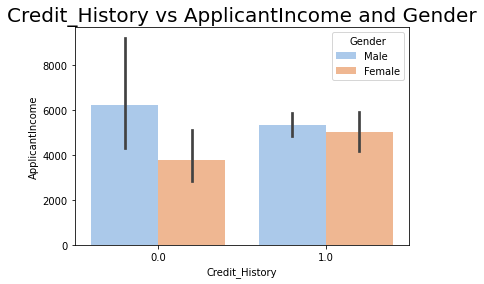

In [58]:
sns.barplot(df['Credit_History'], df['ApplicantIncome'], hue = df['Gender'], palette = 'pastel')
plt.title('Credit_History vs ApplicantIncome and Gender', fontsize = 20)

In [59]:
plt.figure(figsize=(10,10))

import plotly.express as px

fig = px.scatter_3d(df, x='Dependents', y='Gender', z='LoanAmount',#hue='Gender')

color='Credit_History')

fig.show()

<Figure size 720x720 with 0 Axes>

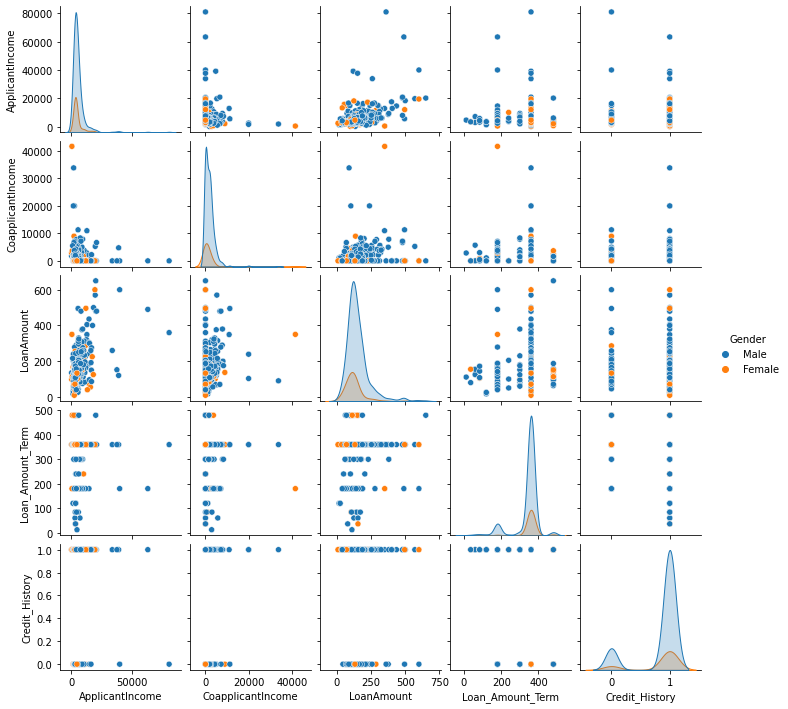

In [60]:
sns.pairplot(df,hue='Gender',size=2)

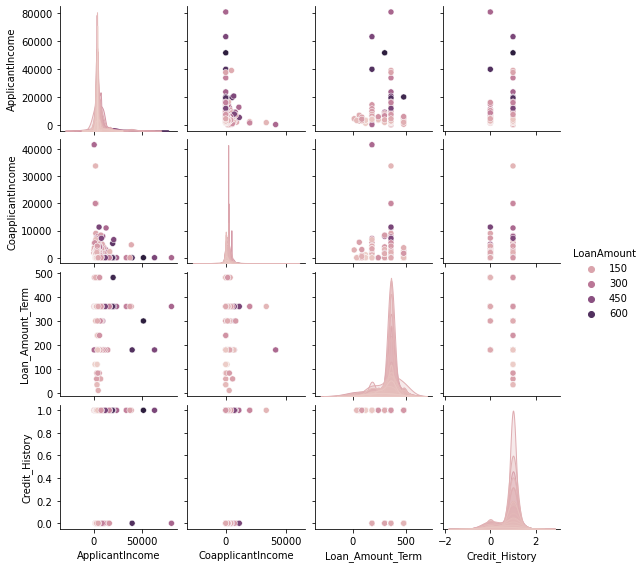

In [61]:
sns.pairplot(df,hue='LoanAmount',size=2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2bafaa6690>,
      dtype=object)

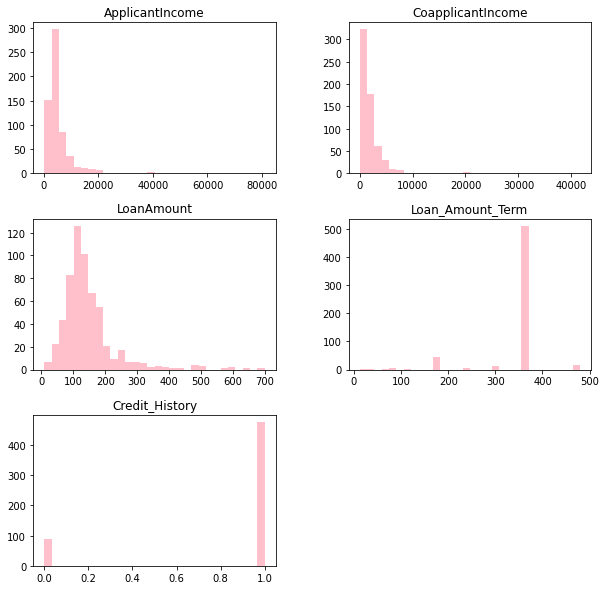

In [62]:
df.hist(figsize=(10,10), grid=False, layout=(3,2), bins = 30 , color = "pink" )